## Exercise 2

In the `FiniteDifferences` notebook we considered the differential equation controlling heat flow which relates the rate of change in $T$, the temperature, to spatial gradients in the same quantity. 

$$
\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2} + H
$$
       
       
We ignored $H$ and solved a number of examples. 

At the end of the notebook we looked at the time-varying solution of the heat equation using an explicit finite difference approximation. Given all the trouble we went to setting this up, don't you think it would be a good idea to see if we can iterate until we reach the steady-state solution?

This is not very complicated to do so I would like you to try it __for the case where $\kappa$ is constant__.

You can copy and paste the cells from the `FiniteDifferences` here to get started.

## Hints

You have most of the code you need. The `np.gradient` function will still be useful ... in fact you really only have to put everything in a `for` loop and enforce the boundary conditions.


In [1]:
# load the appropriate python modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
steps = 50
#boundaries
dy = 1.
dx = 1.

#setting size of array filled with zero below
ny = 27
nx = 25

T = np.zeros((ny,nx))

#empty list
T_store = []

# Initial conditions
#slicing and dicing with array
#initial temp distribution
# we want to set it at the top wall and the bottom wall
T[0,:] = 300.
T[-1,:] = 800.
k = 1.0

# 1 timestep
# np gradient operation
time = 100.0

#loop to replace time value at a step
for i in range(1, steps):
    T[0,:] = 300.
    T[-1,:] = 800.
    #first derivative
    gradTx, gradTy = np.gradient(T, dx, dy)
   #fluxes relate to the change in a particular quantity - in this case K - spatially
    flux_x = k*gradTx
    flux_y = k*gradTy
    #second derivative
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    #adding these together - our second derivatives
    divT = gradTxx + gradTyy
    dt = (dx*dy)/k
    #calculating one step
    time += dt

    #this stores the new T being created within this for loop to the empty array
    T_store.append(T)
    #Changing of T
    T = T + dt*divT
    

Heatmap of Temperature Gradient of Given Time Variance


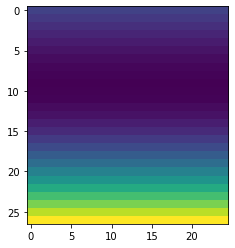

In [220]:
#Can see it is becoming unstable
fig, (ax1) = plt.subplots(1, sharey=True, figsize=(10,4))
ax1.imshow(T)
print('Heatmap of Temperature Gradient of Given Time Variance')
pass

In [221]:
#Makes T_store into an array
T_store = np.array(T_store)

In [222]:
#checking shape, makes sense, in 100 steps there is 99 values (end not included), then has the dimensions
#we set above (27 rows and 25 columns)
T_store.shape

(49, 27, 25)

In [223]:
#Here setting T_diff as T_store from second T (because 0 would be 0) to last element of T, for all rows and 
#all columns MINUS T_store from first T to last entry of T, for all rows and all columns
#this substracts one step aheas
T_diff = T_store[1:,:,:1] - T_store[0:-1,:,:]

In [224]:
#checking shape of the data
print(T_diff.shape)

(48, 27, 25)


In [225]:
#this takes 1 value per timestep, T_diff_red is
#calculating the maximum difference between each time step
T_diff_red = np.abs(T_diff).max(axis=(1,2))

In [226]:
#shape has been changed, not same image data
print(T_diff_red.shape)

(48,)


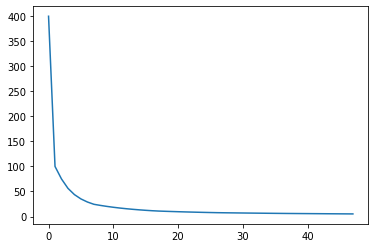

In [227]:
#plotting T_diff_red
#converges as it approaches 0
plt.plot(T_diff_red)
pass

Can see that it approaches convergence pretty quickly, even after almost one time step (saw this by setting timesteps to 10 - below can see what the heat map below shows that setting dt close to 2 shows that you can start to see the solution break down, even though it starts a bit before 1

We know that there is an instability in the code which occurs if the timestep is too large. Currently the timestep size is related to the size of the mesh and the diffusivity:

$$
\Delta t = \frac{\Delta x \Delta y}{\kappa}
$$


What happens if you overwrite the timestep size, `dt`? What is the point where the solution begins to breakdown and you see wild oscillations? Is it pretty close to the above relation?

In [217]:
steps = 1000
dy = 1.
dx = 1.
ny = 27
nx = 25


T = np.zeros((ny,nx))
# Initial conditions
T[0,:] = 300.
T[-1,:] = 800.

k = 1.0
time = 0.0

for i in range(1, steps):
    T[0,:] = 300.
    T[-1,:] = 800.
    
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy
    
    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 1.99
    #calculating one step
    
    T = T + dt * divT


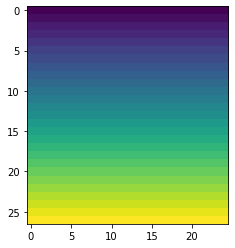

In [218]:
fig, (ax1) = plt.subplots(1, sharey=True, figsize=(10,4))
ax1.imshow(T)
pass

Playing around with the dt value, somewhere between 1.99 and 1.999 the solution begins to breakdown, wild oscilations starting for sure at dt=2. This is what is shown in the plot above of T_diff_red when timestep is set to 10.